# Load Lib 

In [1]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import matplotlib.gridspec as gridspec
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import warnings
# Preparation  
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer, StandardScaler,Normalizer,RobustScaler,MaxAbsScaler,MinMaxScaler,QuantileTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import KBinsDiscretizer
# Import StandardScaler from scikit-learn

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer,IterativeImputer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer,ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline,FeatureUnion
from sklearn.manifold import TSNE
# Import train_test_split()
# Metrics
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import make_scorer,mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve,confusion_matrix
from datetime import datetime, date
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.linear_model import LogisticRegression

#import tensorflow as tf 
#from tensorflow.keras import layers
#from tensorflow.keras.callbacks import EarlyStopping
#from tensorflow.keras.callbacks import LearningRateScheduler
#import smogn
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
# For training random forest model
import lightgbm as lgb
from scipy import sparse
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
# Model selection
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,f_classif,chi2
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_classif,VarianceThreshold

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier
import lightgbm as lgbm
#from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from xgboost import XGBClassifier,XGBRegressor
from sklearn import set_config
from itertools import combinations
# Cluster :
from sklearn.cluster import MiniBatchKMeans
#from yellowbrick.cluster import KElbowVisualizer
#import smong 
import category_encoders as ce
import warnings
#import optuna 
from joblib import Parallel, delayed
import joblib 
from sklearn import set_config
from typing import List, Optional, Union
set_config(display='diagram')
warnings.filterwarnings('ignore')


# Load the data

In [2]:
%%time 
train = pd.read_csv('../input/GiveMeSomeCredit/cs-training.csv')
test = pd.read_csv('../input/GiveMeSomeCredit/cs-test.csv')
train.head(3)

CPU times: user 220 ms, sys: 48.3 ms, total: 269 ms
Wall time: 401 ms


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0


# Convert Dtypes :

In [3]:
# Convert Dtypes :
train[train.select_dtypes(['int64','int16','float16','float32','float64','int8']).columns] = train[train.select_dtypes(['int64','int16','float16','float32','float64','int8']).columns].apply(pd.to_numeric)
train[train.select_dtypes(['object','category']).columns] = train.select_dtypes(['object','category']).apply(lambda x: x.astype('category'))
# Convert Dtypes :
test[test.select_dtypes(['int64','int16','float16','float32','float64','int8']).columns] = test[test.select_dtypes(['int64','int16','float16','float32','float64','int8']).columns].apply(pd.to_numeric)
test[test.select_dtypes(['object','category']).columns] = test.select_dtypes(['object','category']).apply(lambda x: x.astype('category'))

# Reduce Memory

In [4]:
# Author : https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        name =df[col].dtype.name 
        
        if col_type != object and col_type.name != 'category':
        #if name != "category":    
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df
train= reduce_mem_usage(train)
test= reduce_mem_usage(test)

Memory usage of dataframe is 13.73 MB
Memory usage after optimization is: 3.29 MB
Decreased by 76.0%
Memory usage of dataframe is 9.29 MB
Memory usage after optimization is: 2.90 MB
Decreased by 68.7%


# X and Y

In [5]:
# Cardinality : 
# - RevolvingUtilizationOfUnsecuredLines :125728, high Outlier
# - DebtRatio :114194 , high Outlier 
# deal with outlier + bin 
PERCENTAGE = ["RevolvingUtilizationOfUnsecuredLines", "DebtRatio"]
# MonthlyIncome:13594 , high outlier +bin 
REAL= ["MonthlyIncome"]
# Can be considred as cat 
NUMERIC_DISCRET_low = ["NumberOfDependents",
                       "NumberOfTime60-89DaysPastDueNotWorse",
                       "NumberRealEstateLoansOrLines",
                       "NumberOfTimes90DaysLate",
                       "NumberOfOpenCreditLinesAndLoans",
                       "NumberOfTime30-59DaysPastDueNotWorse",
                       "age"]
Late_Pay_Cols = ['NumberOfTime30-59DaysPastDueNotWorse',
                 'NumberOfTimes90DaysLate',
                 'NumberOfTime60-89DaysPastDueNotWorse']
TARGET = ["SeriousDlqin2yrs"]

#also change the type for TARGET to categorical
#df[TARGET] = df[TARGET].astype('category')

In [6]:
y = train['SeriousDlqin2yrs']

In [7]:
def get_outlier_counts(df, outlier_threshold=1.5):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    outlier_counts = ((df < (Q1 - outlier_threshold * IQR)) | (df > (Q3 + outlier_threshold * IQR))).sum()
    return outlier_counts[outlier_counts>0].sort_values(ascending=False)

get_outlier_counts(train, outlier_threshold=3)

DebtRatio                               30457
NumberOfTime30-59DaysPastDueNotWorse    23982
SeriousDlqin2yrs                        10026
NumberOfTimes90DaysLate                  8338
NumberOfTime60-89DaysPastDueNotWorse     7604
MonthlyIncome                            1557
NumberOfDependents                        991
NumberOfOpenCreditLinesAndLoans           442
RevolvingUtilizationOfUnsecuredLines      339
NumberRealEstateLoansOrLines              209
dtype: int64

# Imput before Descritaziation : 

## IterativeImputer


In [8]:
%%time 
param =  {   "verbosity": 0,
            #"objective": "binary:logistic",
            #"eval_metric": "auc",
            'random_state': 42,
            # regression
            'objective':'reg:squarederror', 
             'eval_metric': 'mae',
            #early_stopping_rounds=100 ,
            'gpu_id':0, 
            'predictor':"gpu_predictor",
            # use exact for small dataset.
            "tree_method": "exact",
            # big data :
            # 'tree_method': 'gpu_hist',
            # defines booster, gblinear for linear functions.
             'booster': 'gbtree', 
            'lambda': 8.544792472633987e-07,
            'alpha': 0.31141671752487043,
            'subsample': 0.8779467596981366, 
            'colsample_bytree': 0.9759532762677546,
            'learning_rate': 0.008686087328805853, 
            'n_estimators': 6988,
            'max_depth': 9,
            'min_child_weight': 2, 
            'eta': 3.7603213457541647e-06,
            'gamma': 2.1478058456847449e-07,
            'grow_policy': 'lossguide'}
                

#model_xgb = XGBRegressor(
       #objective="mae",
 #   **xgb_params2)

numeric_transformer1 = Pipeline(
                            steps=[
                            ('imputer', SimpleImputer(strategy='median'
                                                      ,add_indicator=True)),
                            ('scaler', PowerTransformer()),#(Numerical Input, Numerical Output)
                            # Create an SelectKBest object to select features with two best ANOVA F-Values
                            #The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different
                           # ('reducedim',  SelectPercentile(f_classif,percentile=90))
                            ]
                            )
numeric_transformer2 = Pipeline(
                            steps=[
                            #('imputer', SimpleImputer(strategy='median'
                             #                         ,add_indicator=True)),
                            ('scaler', PowerTransformer()),#(Numerical Input, Numerical Output)
                            # Create an SelectKBest object to select features with two best ANOVA F-Values
                            #The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different
                           # ('reducedim',  SelectPercentile(f_classif,percentile=90))
                            ]
                            )

pipe_xgbr1 = Pipeline(
                    steps=[
                        ('preprocessor', numeric_transformer1),
                        ('classifier', XGBRegressor(
                      #objective="mae",
                       **param))
                    ]
                )
pipe_xgbr2 = Pipeline(
                    steps=[
                        ('preprocessor', numeric_transformer2),
                        ('classifier', XGBRegressor(
                      #objective="mae",
                       **param))
                    ]
                )

#imputer=IterativeImputer(estimator=XGBRegressor(
 #                     #objective="mae",
                        #add_indicator=True,
  #                     **param),max_iter=2,random_state=42)
#train=train.drop(['Unnamed: 0','SeriousDlqin2yrs'], axis=1)
#test=test.drop(['Unnamed: 0','SeriousDlqin2yrs'], axis=1)
#imputer.fit(train)
#train = imputer.transform(train)
#test = imputer.transform(test)
#features=['RevolvingUtilizationOfUnsecuredLines', 'age',
#      'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
 #      'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
 #     'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
 #     'NumberOfDependents']
#train=pd.DataFrame(train,columns=features)
#test=pd.DataFrame(test,columns=features)
#train= reduce_mem_usage(train)
#test= reduce_mem_usage(test)

CPU times: user 338 µs, sys: 0 ns, total: 338 µs
Wall time: 343 µs


## Rgression Imputer 

In [9]:
%%time 
train=train.drop(['Unnamed: 0','SeriousDlqin2yrs'], axis=1)
test=test.drop(['Unnamed: 0','SeriousDlqin2yrs'], axis=1)
train_final= pd.concat( [train, test], axis=0) 
#testdf_income= train_final[train_final['MonthlyIncome'].isnull()==True]
traindf_income = train_final[train_final['MonthlyIncome'].isnull()==False]
y_income = traindf_income['MonthlyIncome']
X_income=traindf_income.drop(["MonthlyIncome"],axis=1)
pipe_xgbr1.fit(X_income, y_income)
train_income_missing=train[train['MonthlyIncome'].isnull()==True].drop(["MonthlyIncome"],axis=1)
test_income_missing=test[test['MonthlyIncome'].isnull()==True].drop(["MonthlyIncome"],axis=1)
train_predicted = pipe_xgbr1.predict(train_income_missing)
test_predicted = pipe_xgbr1.predict(test_income_missing)
train.loc[(train.MonthlyIncome.isnull()), 'MonthlyIncome'] = train_predicted
test.loc[(test.MonthlyIncome.isnull()), 'MonthlyIncome'] = test_predicted

CPU times: user 45min 35s, sys: 6.39 s, total: 45min 41s
Wall time: 24min 1s


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float16
 1   age                                   150000 non-null  int8   
 2   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int8   
 3   DebtRatio                             150000 non-null  float32
 4   MonthlyIncome                         150000 non-null  float32
 5   NumberOfOpenCreditLinesAndLoans       150000 non-null  int8   
 6   NumberOfTimes90DaysLate               150000 non-null  int8   
 7   NumberRealEstateLoansOrLines          150000 non-null  int8   
 8   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int8   
 9   NumberOfDependents                    146076 non-null  float16
dtypes: float16(2), float32(2), int8(6)
memory usage: 2.6 MB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float16
 1   age                                   101503 non-null  int8   
 2   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int8   
 3   DebtRatio                             101503 non-null  float32
 4   MonthlyIncome                         101503 non-null  float32
 5   NumberOfOpenCreditLinesAndLoans       101503 non-null  int8   
 6   NumberOfTimes90DaysLate               101503 non-null  int8   
 7   NumberRealEstateLoansOrLines          101503 non-null  int8   
 8   NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int8   
 9   NumberOfDependents                    98877 non-null   float16
dtypes: float16(2), float32(2), int8(6)
memory usage: 1.7 MB


In [12]:
traindf_NumberOfDependents = train_final[train_final['NumberOfDependents'].isnull()==False]
y_NumberOfDependents = traindf_NumberOfDependents['NumberOfDependents']
X_NumberOfDependents=traindf_NumberOfDependents.drop(["NumberOfDependents"],axis=1)
pipe_xgbr2.fit(X_NumberOfDependents, y_NumberOfDependents)
train_NumberOfDependents_missing=train[train['NumberOfDependents'].isnull()==True].drop(["NumberOfDependents"],axis=1)
test_NumberOfDependents_missing=test[test['NumberOfDependents'].isnull()==True].drop(["NumberOfDependents"],axis=1)
train_predicted = pipe_xgbr2.predict(train_NumberOfDependents_missing)
test_predicted = pipe_xgbr2.predict(test_NumberOfDependents_missing)
train.loc[(train.NumberOfDependents.isnull()), 'NumberOfDependents'] = train_predicted
test.loc[(test.NumberOfDependents.isnull()), 'NumberOfDependents'] = test_predicted

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float16
 1   age                                   150000 non-null  int8   
 2   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int8   
 3   DebtRatio                             150000 non-null  float32
 4   MonthlyIncome                         150000 non-null  float32
 5   NumberOfOpenCreditLinesAndLoans       150000 non-null  int8   
 6   NumberOfTimes90DaysLate               150000 non-null  int8   
 7   NumberRealEstateLoansOrLines          150000 non-null  int8   
 8   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int8   
 9   NumberOfDependents                    150000 non-null  float16
dtypes: float16(2), float32(2), int8(6)
memory usage: 2.6 MB


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float16
 1   age                                   101503 non-null  int8   
 2   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int8   
 3   DebtRatio                             101503 non-null  float32
 4   MonthlyIncome                         101503 non-null  float32
 5   NumberOfOpenCreditLinesAndLoans       101503 non-null  int8   
 6   NumberOfTimes90DaysLate               101503 non-null  int8   
 7   NumberRealEstateLoansOrLines          101503 non-null  int8   
 8   NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int8   
 9   NumberOfDependents                    101503 non-null  float16
dtypes: float16(2), float32(2), int8(6)
memory usage: 1.7 MB


# Add Bin 

In [15]:
# Add bin data 
# initializing append_str
append_str = 'cat_'
# Append suffix / prefix to strings in list
num_features1=["RevolvingUtilizationOfUnsecuredLines", "DebtRatio","MonthlyIncome"]
num_features2=["NumberOfDependents",
                       "NumberOfTime60-89DaysPastDueNotWorse",
                       "NumberRealEstateLoansOrLines",
                       "NumberOfTimes90DaysLate",
                       "NumberOfOpenCreditLinesAndLoans",
                       "NumberOfTime30-59DaysPastDueNotWorse",
                       "age"]
cat_features1 = [append_str + sub for sub in num_features1]
cat_features2 = [append_str + sub for sub in num_features2]

# create the discretizer object with strategy quantile and 1000 bins
discretizer1 = KBinsDiscretizer(n_bins=40, encode='ordinal',strategy='quantile')
discretizer2 = KBinsDiscretizer(n_bins=4, encode='ordinal',strategy='quantile')

pipeline1 = Pipeline([
        ('imputer', SimpleImputer( strategy='median')),
        ('bin', discretizer1)
    ])
# fit the discretizer to the train set
pipeline1.fit(train.loc[:,num_features1])
# apply the discretisation
train_cat1 = pipeline1.transform(train.loc[:,num_features1])
test_cat1 = pipeline1.transform(test.loc[:,num_features1])
train_df1=pd.DataFrame(train_cat1,columns=cat_features1).astype('category')
test_df1=pd.DataFrame(test_cat1,columns=cat_features1).astype('category')
train_final1= pd.concat( [train.loc[:,num_features1], train_df1], axis=1) 
test_final1= pd.concat( [test.loc[:,num_features1], test_df1], axis=1) 

pipeline2 = Pipeline([
        ('imputer', SimpleImputer( strategy='median')),
        ('bin', discretizer2)
    ])
# fit the discretizer to the train set
pipeline2.fit(train.loc[:,num_features2])
# apply the discretisation
train_cat2 = pipeline2.transform(train.loc[:,num_features2])
test_cat2 = pipeline2.transform(test.loc[:,num_features2])
train_df2=pd.DataFrame(train_cat2,columns=cat_features2).astype('category')
test_df2=pd.DataFrame(test_cat2,columns=cat_features2).astype('category')
train_final2= pd.concat( [train.loc[:,num_features2], train_df2], axis=1) 
test_final2= pd.concat( [test.loc[:,num_features2], test_df2], axis=1) 

In [16]:
train_final= pd.concat( [train_final1, train_final2], axis=1) 
test_final= pd.concat( [test_final1, test_final2], axis=1) 

# Final X and y

In [17]:
# Pour le train test
target= "SeriousDlqin2yrs"
X = train_final# axis=1
X_test_final =test_final# axis=1

In [18]:
X_test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 20 columns):
 #   Column                                    Non-Null Count   Dtype   
---  ------                                    --------------   -----   
 0   RevolvingUtilizationOfUnsecuredLines      101503 non-null  float16 
 1   DebtRatio                                 101503 non-null  float32 
 2   MonthlyIncome                             101503 non-null  float32 
 3   cat_RevolvingUtilizationOfUnsecuredLines  101503 non-null  category
 4   cat_DebtRatio                             101503 non-null  category
 5   cat_MonthlyIncome                         101503 non-null  category
 6   NumberOfDependents                        101503 non-null  float16 
 7   NumberOfTime60-89DaysPastDueNotWorse      101503 non-null  int8    
 8   NumberRealEstateLoansOrLines              101503 non-null  int8    
 9   NumberOfTimes90DaysLate                   101503 non-null  int8    
 10  NumberOf

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 20 columns):
 #   Column                                    Non-Null Count   Dtype   
---  ------                                    --------------   -----   
 0   RevolvingUtilizationOfUnsecuredLines      150000 non-null  float16 
 1   DebtRatio                                 150000 non-null  float32 
 2   MonthlyIncome                             150000 non-null  float32 
 3   cat_RevolvingUtilizationOfUnsecuredLines  150000 non-null  category
 4   cat_DebtRatio                             150000 non-null  category
 5   cat_MonthlyIncome                         150000 non-null  category
 6   NumberOfDependents                        150000 non-null  float16 
 7   NumberOfTime60-89DaysPastDueNotWorse      150000 non-null  int8    
 8   NumberRealEstateLoansOrLines              150000 non-null  int8    
 9   NumberOfTimes90DaysLate                   150000 non-null  int8    
 10  NumberOf

# Features Engineer

In [20]:
def feature_eng(df):
    
    df['Weighted_Sum_PastDue'] = 2 * df['NumberOfTime30-59DaysPastDueNotWorse'] + 3 * df['NumberOfTime60-89DaysPastDueNotWorse'] + 6 * df['NumberOfTimes90DaysLate']
    
    df['90days_out_of_TotalPastDue'] = df['NumberOfTimes90DaysLate'] / (df['Weighted_Sum_PastDue'])
    df.loc[df['Weighted_Sum_PastDue']==0, '90days_out_of_TotalPastDue'] = 0
   
    df['RemainingLines'] = df['NumberOfOpenCreditLinesAndLoans'] - df['NumberRealEstateLoansOrLines']

    df['Loans_vs_Other_Lines'] = df['RemainingLines'] / (1 + df['NumberRealEstateLoansOrLines'])

    df['Debt_per_Real_Estate_Loan'] = df['DebtRatio'] / df['NumberRealEstateLoansOrLines']
    df.loc[df['NumberRealEstateLoansOrLines']==0, 'Debt_per_Real_Estate_Loan'] = 0

    df['Disposable_Income_per_person'] = (df['MonthlyIncome'] - df['DebtRatio']) / (df['NumberOfDependents'] + 1)
    df.loc[df['NumberOfDependents']==0, 'Disposable_Income_per_person'] = 0

    df['RemainingLines_per_person'] = df['RemainingLines'] / (df['NumberOfDependents'] + 1)

    df['NumberRE_X_DebtRatio_X_age'] = df['NumberRealEstateLoansOrLines'] * df['DebtRatio'] / df['age']

    df['RevolvingUtilization_per_age'] = df['RevolvingUtilizationOfUnsecuredLines'] / df['age']

    #df.drop(['MonthlyIncome', 'NumberRealEstateLoansOrLines'], axis=1, inplace=True)
    df[df==np.inf]=np.nan
    #df.fillna(df.median(), inplace=True)
    #credit:https://www.kaggle.com/jamesngoa/credit-scoring-feature-eng-and-prediction-0-8674
    return df

In [21]:
X_new=X.copy()
X_new=feature_eng(X_new)
X_test_final_new=X_test_final.copy()
X_test_final_new=feature_eng(X_test_final_new)
X_new= reduce_mem_usage(X_new)
X_test_final_new= reduce_mem_usage(X_test_final_new)

Memory usage of dataframe is 8.87 MB
Memory usage after optimization is: 6.87 MB
Decreased by 22.6%
Memory usage of dataframe is 6.01 MB
Memory usage after optimization is: 4.65 MB
Decreased by 22.6%


In [22]:
del train
del test 
del train_final
del test_final


## Drop NAN 

In [23]:
X_new=X.copy()
X_new=feature_eng(X_new)
X_test_final_new=X_test_final.copy()
X_test_final_new=feature_eng(X_test_final)
X_without_missing=X.drop(['MonthlyIncome', 'NumberOfDependents'], axis=1)
X_new_without_missing=X_new.drop(['MonthlyIncome', 'NumberOfDependents'], axis=1)
X_test_final_without_missing=X_test_final.drop(['MonthlyIncome', 'NumberOfDependents'], axis=1)
X_test_final_new_without_missing=X_test_final_new.drop(['MonthlyIncome', 'NumberOfDependents'], axis=1)

# Extract final cat  and num Features 
## Cat Features 

In [24]:
# select non-numeric columns
cat_columns = X.select_dtypes(exclude=['int64','int16','float16','float32','float64','int8']).columns
cat_columns_new = X_new.select_dtypes(exclude=['int64','int16','float16','float32','float64','int8']).columns
cat_columns_without_missing = X_without_missing.select_dtypes(exclude=['int64','int16','float16','float32','float64','int8']).columns
cat_columns_new_without_missing  = X_new_without_missing.select_dtypes(exclude=['int64','int16','float16','float32','float64','int8']).columns
cat_columns_new_without_missing

Index(['cat_RevolvingUtilizationOfUnsecuredLines', 'cat_DebtRatio',
       'cat_MonthlyIncome', 'cat_NumberOfDependents',
       'cat_NumberOfTime60-89DaysPastDueNotWorse',
       'cat_NumberRealEstateLoansOrLines', 'cat_NumberOfTimes90DaysLate',
       'cat_NumberOfOpenCreditLinesAndLoans',
       'cat_NumberOfTime30-59DaysPastDueNotWorse', 'cat_age'],
      dtype='object')

**Num Features**



In [25]:
# select the float columns
num_columns = X.select_dtypes(include=['int64','int16','float16','float32','float64','int8']).columns
num_columns_new = X_new.select_dtypes(include=['int64','int16','float16','float32','float64','int8']).columns
num_columns_without_missing = X_without_missing.select_dtypes(include=['int64','int16','float16','float32','float64','int8']).columns
num_columns_new_without_missing = X_new_without_missing.select_dtypes(include=['int64','int16','float16','float32','float64','int8']).columns
num_columns_new_without_missing

Index(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberRealEstateLoansOrLines',
       'NumberOfTimes90DaysLate', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTime30-59DaysPastDueNotWorse', 'age', 'Weighted_Sum_PastDue',
       '90days_out_of_TotalPastDue', 'RemainingLines', 'Loans_vs_Other_Lines',
       'Debt_per_Real_Estate_Loan', 'Disposable_Income_per_person',
       'RemainingLines_per_person', 'NumberRE_X_DebtRatio_X_age',
       'RevolvingUtilization_per_age'],
      dtype='object')

# Outlier handle:


In [26]:
# Outlier Handle 
class OutlierReplace(BaseEstimator,TransformerMixin):
    def __init__(self,factor=1.5):
        self.factor = factor

    def outlier_removal(self,X,y=None):
        X = pd.Series(X).copy()
        #qmin=X.quantile(0.01)
        qmax=X.quantile(0.995)
        #q1 = X.quantile(0.25)
        #q3 = X.quantile(0.75)
        #iqr = q3 - q1
        #lower_bound = q1 - (self.factor * iqr)
        #upper_bound = q3 + (self.factor * iqr)
        upper_bound = X.quantile(0.995)
        #X.loc[((X < lower_bound) | (X > upper_bound))] = np.nan 
        #X.loc[X < lower_bound] = qmin
        X.loc[X > upper_bound] = qmax
        return pd.Series(X)

    def fit(self,X,y=None):
        return self

    def transform(self,X,y=None):
        return X.apply(self.outlier_removal) 

# Baseline  Pipe0:OWE+Powertransformer

In [27]:
# Cat pipeline
categorical_transformer = Pipeline(
                    steps=[
                        ('imputer', SimpleImputer(strategy='most_frequent',
                                                  fill_value='missing',
                                                  add_indicator=True)),
                        ('encoder',  ce.woe.WOEEncoder()),#(Numerical Input, Categorical Output)
                         ('reducedim',  SelectPercentile( mutual_info_classif, percentile=90))

                    ]
                    ) 
#Define vnum pipeline
numeric_transformer = Pipeline(
                            steps=[
                            ('imputer', SimpleImputer(strategy='median'
                                                      ,add_indicator=True)),
                            ('scaler', PowerTransformer()),#(Numerical Input, Numerical Output)
                            # Create an SelectKBest object to select features with two best ANOVA F-Values
                            #The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different
                            ('reducedim',  SelectPercentile(f_classif,percentile=90))
                            ]
                            )
# Features union cat + num 
# WOE+PowerTransformer
preprocessor_woe_powertransformer = ColumnTransformer(
            transformers=[
                ('numerical', numeric_transformer, num_columns),
                ('categorical', categorical_transformer, cat_columns)
            ]
            )
lgbm_param={'learning_rate': 0.0018069834369607075,
                             'max_depth': 8,
                             #'max_features': 4,
                             'min_samples_leaf': 47,
                             #'min_samples_split': 389,
                             'subsample': 0.8573598985000007,
                             #'n_iter_no_change': 300,
                             'n_estimators': 5000,
                            # 'verbose': 0,
                             'random_state': 42,
                             'metric': 'auc',
                             "device_type" : "gpu",
                            'boosting_type': 'gbdt',
                           # 'tree_method': "gpu_hist"
                           }
pipe_lgbm_woe_powertransformer = Pipeline(
    steps=[
        ('preprocessor', preprocessor_woe_powertransformer),
        ('classifier', lgbm.LGBMClassifier( 
            #n_jobs=-1,
                                           verbose=-1,
                                           **lgbm_param))
    ]
)
pipe_lgbm_woe_powertransformer

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='median')),
                                                                  ('scaler',
                                                                   PowerTransformer()),
                                                                  ('reducedim',
                                                                   SelectPercentile(percentile=90))]),
                                                  Index(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome',
       'NumberOfDependents', 'NumberOfTime60-89Da...
       'cat_NumberRealEstateLoansOrLines', 'cat_NumberOfTimes90DaysLate',
       'cat_NumberOfOpenCreditLinesAndLoans',
       'cat_NumberOfTime30-59DaysPastDueNotWorse', 'cat_age'],
      dtype='object'))])),
                ('classifier',
                 LGBMClassifier(device_type='gpu',
                                learning_rate=0.0018069834369607075,
                                max_depth=8, metric='auc', min_samples_leaf=47,
                                n_estimators=5000, random_state=42,
                                subsample=0.8573598985000007, verbose=-1))])

## Add outlier Handle:outlier+woe+powertransormer 

In [28]:
#Define vnum pipeline
numeric_transformer_outlier = Pipeline(
                            steps=[('outlierhandle', OutlierReplace()),
                            ('imputer', SimpleImputer(strategy='median'
                                                      ,add_indicator=True)),
                            ('scaler', PowerTransformer()),#(Numerical Input, Numerical Output)
                            # Create an SelectKBest object to select features with two best ANOVA F-Values
                            #The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different
                            ('reducedim',  SelectPercentile(f_classif,percentile=90))
                            ]
                            )
# Features union cat + num 
# WOE+PowerTransformer
preprocessor_woe_powertransformer_outlier = ColumnTransformer(
            transformers=[
                ('numerical', numeric_transformer_outlier, num_columns),
                ('categorical', categorical_transformer, cat_columns)
            ]
            )
pipe_lgbm_woe_powertransformer_outlier = Pipeline(
    steps=[
        ('preprocessor', preprocessor_woe_powertransformer_outlier),
        ('classifier', lgbm.LGBMClassifier( 
            #n_jobs=-1,
                                           verbose=-1,
                                           **lgbm_param))
    ]
)
pipe_lgbm_woe_powertransformer_outlier

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('outlierhandle',
                                                                   OutlierReplace()),
                                                                  ('imputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='median')),
                                                                  ('scaler',
                                                                   PowerTransformer()),
                                                                  ('reducedim',
                                                                   SelectPercentile(percentile=90))]),
                                                  Index(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome',
       'Numbe...
       'cat_NumberRealEstateLoansOrLines', 'cat_NumberOfTimes90DaysLate',
       'cat_NumberOfOpenCreditLinesAndLoans',
       'cat_NumberOfTime30-59DaysPastDueNotWorse', 'cat_age'],
      dtype='object'))])),
                ('classifier',
                 LGBMClassifier(device_type='gpu',
                                learning_rate=0.0018069834369607075,
                                max_depth=8, metric='auc', min_samples_leaf=47,
                                n_estimators=5000, random_state=42,
                                subsample=0.8573598985000007, verbose=-1))])

### Delete missing:woe+powertransormer for not null data 


In [29]:
# Features union cat + num 
# WOE+PowerTransformer
preprocessor_woe_powertransformer_without_missing = ColumnTransformer(
            transformers=[
                ('numerical', numeric_transformer, num_columns_without_missing),
                ('categorical', categorical_transformer, cat_columns_without_missing)
            ]
            )
pipe_lgbm_woe_powertransformer_without_missing = Pipeline(
    steps=[
        ('preprocessor', preprocessor_woe_powertransformer_without_missing),
        ('classifier', lgbm.LGBMClassifier( 
            #n_jobs=-1,
                                           verbose=-1,
                                           **lgbm_param))
    ]
)
pipe_lgbm_woe_powertransformer_without_missing

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='median')),
                                                                  ('scaler',
                                                                   PowerTransformer()),
                                                                  ('reducedim',
                                                                   SelectPercentile(percentile=90))]),
                                                  Index(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberRealEstateL...
       'cat_NumberRealEstateLoansOrLines', 'cat_NumberOfTimes90DaysLate',
       'cat_NumberOfOpenCreditLinesAndLoans',
       'cat_NumberOfTime30-59DaysPastDueNotWorse', 'cat_age'],
      dtype='object'))])),
                ('classifier',
                 LGBMClassifier(device_type='gpu',
                                learning_rate=0.0018069834369607075,
                                max_depth=8, metric='auc', min_samples_leaf=47,
                                n_estimators=5000, random_state=42,
                                subsample=0.8573598985000007, verbose=-1))])

# Pipe2: CatBoostEncoder + Power transformer


In [30]:
#Define cat pipeline
# Cat pipeline
categorical_transformer_catboost = Pipeline(
                    steps=[
                        ('imputer', SimpleImputer(strategy='most_frequent',
                                                  fill_value='missing',
                                                  add_indicator=True)),
                        ('encoder',  ce.cat_boost.CatBoostEncoder()),#(Numerical Input, Categorical Output)
                         ('reducedim',  SelectPercentile( mutual_info_classif,
                                                         percentile=90))
                    ]
                    ) 
#Define vnum pipeline
numeric_transformer = Pipeline(
                            steps=[
                            ('imputer', SimpleImputer(strategy='median'
                                                      ,add_indicator=True)),
                            ('scaler', PowerTransformer()),#(Numerical Input, Numerical Output)
                            # Create an SelectKBest object to select features with two best ANOVA F-Values
                            #The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different
                            ('reducedim',  SelectPercentile(f_classif,percentile=90))
                            ]
                            )
# Features union cat + num 
# Catboost+PowerTransformer
preprocessor_catboost_powertransformer = ColumnTransformer(
            transformers=[
                ('numerical', numeric_transformer, num_columns),
                ('categorical', categorical_transformer_catboost, cat_columns)
            ]
            )
pipe_lgbm_catboost_powertransformer = Pipeline(
    steps=[
        ('preprocessor', preprocessor_catboost_powertransformer),
        ('classifier', lgbm.LGBMClassifier( 
            #n_jobs=-1,
                                           verbose=-1,
                                           **lgbm_param))
    ]
)
pipe_lgbm_catboost_powertransformer

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='median')),
                                                                  ('scaler',
                                                                   PowerTransformer()),
                                                                  ('reducedim',
                                                                   SelectPercentile(percentile=90))]),
                                                  Index(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome',
       'NumberOfDependents', 'NumberOfTime60-89Da...
       'cat_NumberRealEstateLoansOrLines', 'cat_NumberOfTimes90DaysLate',
       'cat_NumberOfOpenCreditLinesAndLoans',
       'cat_NumberOfTime30-59DaysPastDueNotWorse', 'cat_age'],
      dtype='object'))])),
                ('classifier',
                 LGBMClassifier(device_type='gpu',
                                learning_rate=0.0018069834369607075,
                                max_depth=8, metric='auc', min_samples_leaf=47,
                                n_estimators=5000, random_state=42,
                                subsample=0.8573598985000007, verbose=-1))])

## Handle Outlier:CatBoostEncoder + Power transformer

In [31]:
#Define vnum pipeline
numeric_transformer_outlier = Pipeline(
                            steps=[('outlierhandle', OutlierReplace()),
                            ('imputer', SimpleImputer(strategy='median'
                                                      ,add_indicator=True)),
                            ('scaler', PowerTransformer()),#(Numerical Input, Numerical Output)
                            # Create an SelectKBest object to select features with two best ANOVA F-Values
                            #The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different
                            ('reducedim',  SelectPercentile(f_classif,percentile=90))
                            ]
                            )
# Features union cat + num 
# WOE+PowerTransformer
preprocessor_catboost_powertransformer_outlier = ColumnTransformer(
            transformers=[
                ('numerical', numeric_transformer_outlier, num_columns),
                ('categorical', categorical_transformer_catboost, cat_columns)
            ]
            )
pipe_lgbm_catboost_powertransformer_outlier = Pipeline(
    steps=[
        ('preprocessor', preprocessor_catboost_powertransformer_outlier),
        ('classifier', lgbm.LGBMClassifier( 
            #n_jobs=-1,
                                           verbose=-1,
                                           **lgbm_param))
    ]
)
pipe_lgbm_catboost_powertransformer_outlier

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('outlierhandle',
                                                                   OutlierReplace()),
                                                                  ('imputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='median')),
                                                                  ('scaler',
                                                                   PowerTransformer()),
                                                                  ('reducedim',
                                                                   SelectPercentile(percentile=90))]),
                                                  Index(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome',
       'Numbe...
       'cat_NumberRealEstateLoansOrLines', 'cat_NumberOfTimes90DaysLate',
       'cat_NumberOfOpenCreditLinesAndLoans',
       'cat_NumberOfTime30-59DaysPastDueNotWorse', 'cat_age'],
      dtype='object'))])),
                ('classifier',
                 LGBMClassifier(device_type='gpu',
                                learning_rate=0.0018069834369607075,
                                max_depth=8, metric='auc', min_samples_leaf=47,
                                n_estimators=5000, random_state=42,
                                subsample=0.8573598985000007, verbose=-1))])

## Drop misssing :CatBoostEncoder + Power transformer

In [32]:
# Features union cat + num 
# WOE+PowerTransformer

pipe_lgbm_catboost_powertransformer_without_missing = ColumnTransformer(
            transformers=[
                ('numerical', numeric_transformer, num_columns_without_missing),
                ('categorical', categorical_transformer_catboost, cat_columns_without_missing)
            ]
            )
pipe_lgbm_catboost_powertransformer_without_missing = Pipeline(
    steps=[
        ('preprocessor', pipe_lgbm_catboost_powertransformer_without_missing),
        ('classifier', lgbm.LGBMClassifier( 
            #n_jobs=-1,
                                           verbose=-1,
                                           **lgbm_param))
    ]
)
pipe_lgbm_catboost_powertransformer_without_missing

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='median')),
                                                                  ('scaler',
                                                                   PowerTransformer()),
                                                                  ('reducedim',
                                                                   SelectPercentile(percentile=90))]),
                                                  Index(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberRealEstateL...
       'cat_NumberRealEstateLoansOrLines', 'cat_NumberOfTimes90DaysLate',
       'cat_NumberOfOpenCreditLinesAndLoans',
       'cat_NumberOfTime30-59DaysPastDueNotWorse', 'cat_age'],
      dtype='object'))])),
                ('classifier',
                 LGBMClassifier(device_type='gpu',
                                learning_rate=0.0018069834369607075,
                                max_depth=8, metric='auc', min_samples_leaf=47,
                                n_estimators=5000, random_state=42,
                                subsample=0.8573598985000007, verbose=-1))])

## Messing +Outlier handle :CatBoostEncoder + Power transformer

In [33]:
# Features union cat + num 
# WOE+PowerTransformer
preprocessor_catboost_powertransformer_outlier_without_missing = ColumnTransformer(
            transformers=[
                ('numerical', numeric_transformer_outlier, num_columns_without_missing),
                ('categorical', categorical_transformer_catboost, cat_columns_without_missing)
            ]
            )
pipe_lgbm_catboost_powertransformer_outlier_without_missing = Pipeline(
    steps=[
        ('preprocessor', preprocessor_catboost_powertransformer_outlier_without_missing),
        ('classifier', lgbm.LGBMClassifier( 
            #n_jobs=-1,
                                           verbose=-1,
                                           **lgbm_param))
    ]
)
pipe_lgbm_catboost_powertransformer_outlier_without_missing

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('outlierhandle',
                                                                   OutlierReplace()),
                                                                  ('imputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='median')),
                                                                  ('scaler',
                                                                   PowerTransformer()),
                                                                  ('reducedim',
                                                                   SelectPercentile(percentile=90))]),
                                                  Index(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio',
       'NumberOfTime60-89Days...
       'cat_NumberRealEstateLoansOrLines', 'cat_NumberOfTimes90DaysLate',
       'cat_NumberOfOpenCreditLinesAndLoans',
       'cat_NumberOfTime30-59DaysPastDueNotWorse', 'cat_age'],
      dtype='object'))])),
                ('classifier',
                 LGBMClassifier(device_type='gpu',
                                learning_rate=0.0018069834369607075,
                                max_depth=8, metric='auc', min_samples_leaf=47,
                                n_estimators=5000, random_state=42,
                                subsample=0.8573598985000007, verbose=-1))])

# Pipe 3: catboost +qauntile transformer  


In [34]:
# complete pipe :
# select the float/cat columns
#cat_feautres = X.select_dtypes(include=['object','category']).columns
#num_features = X.select_dtypes(exclude=['object','category']).columns
categorical_transformer_catboost = Pipeline(
                    steps=[
                        ('imputer', SimpleImputer(strategy='most_frequent',
                                                  fill_value='missing',
                                                  add_indicator=True)),
                        ('encoder',  ce.cat_boost.CatBoostEncoder()),#(Numerical Input, Categorical Output)
                         ('reducedim',  SelectPercentile( mutual_info_classif,
                                                        percentile=90))

                    ]
                    ) 
numeric_transformer_quantile = Pipeline(
                            steps=[
                            ('imputer', SimpleImputer(strategy='median'
                                                      ,add_indicator=True)),
                            ('scaler', QuantileTransformer()),#(Numerical Input, Numerical Output)
                            # Create an SelectKBest object to select features with two best ANOVA F-Values
                            #The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different
                            ('reducedim',  SelectPercentile(f_classif,
                                                            percentile=90))
                                # i used 90 before

                            ]
                            )
# Features union cat + num 
# Catboost+QuantileTransformer
preprocessor_catboost_qauntile = ColumnTransformer(
            transformers=[
                ('numerical', numeric_transformer_quantile, num_columns),
                ('categorical', categorical_transformer_catboost, cat_columns)
            ]
            )
pipe_lgbm_catboost_qauntile = Pipeline(
    steps=[
        ('preprocessor', preprocessor_catboost_qauntile),
        ('classifier', lgbm.LGBMClassifier( 
            #n_jobs=-1,
                                           verbose=-1,
                                           **lgbm_param))
    ]
)
pipe_lgbm_catboost_qauntile

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='median')),
                                                                  ('scaler',
                                                                   QuantileTransformer()),
                                                                  ('reducedim',
                                                                   SelectPercentile(percentile=90))]),
                                                  Index(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome',
       'NumberOfDependents', 'NumberOfTime60-8...
       'cat_NumberRealEstateLoansOrLines', 'cat_NumberOfTimes90DaysLate',
       'cat_NumberOfOpenCreditLinesAndLoans',
       'cat_NumberOfTime30-59DaysPastDueNotWorse', 'cat_age'],
      dtype='object'))])),
                ('classifier',
                 LGBMClassifier(device_type='gpu',
                                learning_rate=0.0018069834369607075,
                                max_depth=8, metric='auc', min_samples_leaf=47,
                                n_estimators=5000, random_state=42,
                                subsample=0.8573598985000007, verbose=-1))])

## Add Outlier Handle:catboost +qauntile transformer  

In [35]:
# complete pipe :
# select the float/cat columns
#cat_feautres = X.select_dtypes(include=['object','category']).columns
#num_features = X.select_dtypes(exclude=['object','category']).columns
categorical_transformer_catboost = Pipeline(
                    steps=[
                        ('imputer', SimpleImputer(strategy='most_frequent',
                                                  fill_value='missing',
                                                  add_indicator=True)),
                        ('encoder',  ce.cat_boost.CatBoostEncoder()),#(Numerical Input, Categorical Output)
                         ('reducedim',  SelectPercentile( mutual_info_classif,
                                                        percentile=90))

                    ]
                    ) 
numeric_transformer_quantile_outlier = Pipeline(
                            steps=[('outlierhandle', OutlierReplace()),
                            ('imputer', SimpleImputer(strategy='median'
                                                      ,add_indicator=True)),
                            ('scaler', QuantileTransformer()),#(Numerical Input, Numerical Output)
                            # Create an SelectKBest object to select features with two best ANOVA F-Values
                            #The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different
                            ('reducedim',  SelectPercentile(f_classif,
                                                            percentile=90))
                                # i used 90 before

                            ]
                            )
# Features union cat + num 
# Catboost+QuantileTransformer
preprocessor_catboost_qauntile_outlier = ColumnTransformer(
            transformers=[
                ('numerical', numeric_transformer_quantile_outlier, num_columns),
                ('categorical', categorical_transformer_catboost, cat_columns)
            ]
            )
pipe_lgbm_catboost_qauntile_outlier = Pipeline(
    steps=[
        ('preprocessor', preprocessor_catboost_qauntile_outlier),
        ('classifier', lgbm.LGBMClassifier( 
            #n_jobs=-1,
                                           verbose=-1,
                                           **lgbm_param))
    ]
)

pipe_lgbm_catboost_qauntile_outlier

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('outlierhandle',
                                                                   OutlierReplace()),
                                                                  ('imputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='median')),
                                                                  ('scaler',
                                                                   QuantileTransformer()),
                                                                  ('reducedim',
                                                                   SelectPercentile(percentile=90))]),
                                                  Index(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome',
       'Nu...
       'cat_NumberRealEstateLoansOrLines', 'cat_NumberOfTimes90DaysLate',
       'cat_NumberOfOpenCreditLinesAndLoans',
       'cat_NumberOfTime30-59DaysPastDueNotWorse', 'cat_age'],
      dtype='object'))])),
                ('classifier',
                 LGBMClassifier(device_type='gpu',
                                learning_rate=0.0018069834369607075,
                                max_depth=8, metric='auc', min_samples_leaf=47,
                                n_estimators=5000, random_state=42,
                                subsample=0.8573598985000007, verbose=-1))])

## Drop Missing:catboost +qauntile transformer  

In [36]:
# Features union cat + num 
# Catboost+QuantileTransformer
preprocessor_catboost_qauntile_without_missing = ColumnTransformer(
            transformers=[
                ('numerical', numeric_transformer_quantile, num_columns_without_missing ),
                ('categorical', categorical_transformer_catboost, cat_columns_without_missing )
            ]
            )
pipe_lgbm_catboost_qauntile_without_missing  = Pipeline(
    steps=[
        ('preprocessor', preprocessor_catboost_qauntile_without_missing ),
        ('classifier', lgbm.LGBMClassifier( 
            #n_jobs=-1,
                                           verbose=-1,
                                           **lgbm_param))
    ]
)
pipe_lgbm_catboost_qauntile_without_missing 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='median')),
                                                                  ('scaler',
                                                                   QuantileTransformer()),
                                                                  ('reducedim',
                                                                   SelectPercentile(percentile=90))]),
                                                  Index(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberRealEsta...
       'cat_NumberRealEstateLoansOrLines', 'cat_NumberOfTimes90DaysLate',
       'cat_NumberOfOpenCreditLinesAndLoans',
       'cat_NumberOfTime30-59DaysPastDueNotWorse', 'cat_age'],
      dtype='object'))])),
                ('classifier',
                 LGBMClassifier(device_type='gpu',
                                learning_rate=0.0018069834369607075,
                                max_depth=8, metric='auc', min_samples_leaf=47,
                                n_estimators=5000, random_state=42,
                                subsample=0.8573598985000007, verbose=-1))])

## Drop Null+handle outlier : catboost +qauntile transformer  

In [37]:
# Features union cat + num 
# Catboost+QuantileTransformer
preprocessor_catboost_qauntile_outlier_without_missing = ColumnTransformer(
            transformers=[
                ('numerical', numeric_transformer_quantile_outlier, num_columns_without_missing),
                ('categorical', categorical_transformer_catboost, cat_columns_without_missing)
            ]
            )
pipe_lgbm_catboost_qauntile_outlier_without_missing = Pipeline(
    steps=[
        ('preprocessor', preprocessor_catboost_qauntile_outlier_without_missing),
        ('classifier', lgbm.LGBMClassifier( 
            #n_jobs=-1,
                                           verbose=-1,
                                           **lgbm_param))
    ]
)
pipe_lgbm_catboost_qauntile_outlier_without_missing

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('outlierhandle',
                                                                   OutlierReplace()),
                                                                  ('imputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='median')),
                                                                  ('scaler',
                                                                   QuantileTransformer()),
                                                                  ('reducedim',
                                                                   SelectPercentile(percentile=90))]),
                                                  Index(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio',
       'NumberOfTime60-89D...
       'cat_NumberRealEstateLoansOrLines', 'cat_NumberOfTimes90DaysLate',
       'cat_NumberOfOpenCreditLinesAndLoans',
       'cat_NumberOfTime30-59DaysPastDueNotWorse', 'cat_age'],
      dtype='object'))])),
                ('classifier',
                 LGBMClassifier(device_type='gpu',
                                learning_rate=0.0018069834369607075,
                                max_depth=8, metric='auc', min_samples_leaf=47,
                                n_estimators=5000, random_state=42,
                                subsample=0.8573598985000007, verbose=-1))])

# Pipe 4 Catoost + RobustScaler : 


In [38]:
categorical_transformer_catboost = Pipeline(
                    steps=[
                        ('imputer', SimpleImputer(strategy='most_frequent',
                                                  fill_value='missing',
                                                  add_indicator=True)),
                        ('encoder',  ce.cat_boost.CatBoostEncoder()),#(Numerical Input, Categorical Output)
                         ('reducedim',  SelectPercentile( mutual_info_classif,
                                                        percentile=90))
                    ]
                    ) 


numeric_transformer_robustscaler = Pipeline(
                            steps=[
                            ('imputer', SimpleImputer(strategy='median'
                                                      ,add_indicator=True)),
                            ('scaler', RobustScaler()),#(Numerical Input, Numerical Output)
                            # Create an SelectKBest object to select features with two best ANOVA F-Values
                            #The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different
                            ('reducedim',  SelectPercentile(f_classif,
                                                           percentile=90))
                            ]
                            )
# Features union cat + num 
# Catboost+QuantileTransformer
preprocessor_catboost_robust = ColumnTransformer(
            transformers=[
                ('numerical', numeric_transformer_robustscaler, num_columns),
                ('categorical', categorical_transformer_catboost, cat_columns)
            ]
            )
pipe_lgbm_catboost_robust = Pipeline(
    steps=[
        ('preprocessor', preprocessor_catboost_robust),
        ('classifier', lgbm.LGBMClassifier( 
            #n_jobs=-1,
                                           verbose=-1,
                                           **lgbm_param))
    ]
)
pipe_lgbm_catboost_robust

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler()),
                                                                  ('reducedim',
                                                                   SelectPercentile(percentile=90))]),
                                                  Index(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome',
       'NumberOfDependents', 'NumberOfTime60-89DaysPa...
       'cat_NumberRealEstateLoansOrLines', 'cat_NumberOfTimes90DaysLate',
       'cat_NumberOfOpenCreditLinesAndLoans',
       'cat_NumberOfTime30-59DaysPastDueNotWorse', 'cat_age'],
      dtype='object'))])),
                ('classifier',
                 LGBMClassifier(device_type='gpu',
                                learning_rate=0.0018069834369607075,
                                max_depth=8, metric='auc', min_samples_leaf=47,
                                n_estimators=5000, random_state=42,
                                subsample=0.8573598985000007, verbose=-1))])

# Pipe6 :cat+power+fe 


In [39]:
preprocessor_catboost_powertransformer_new_fe = ColumnTransformer(
            transformers=[
                ('numerical', numeric_transformer, num_columns_new),
                ('categorical', categorical_transformer_catboost, cat_columns_new)
            ]
            )

pipe_lgbm_catboost_powertransformer_new_fe = Pipeline(
    steps=[
        ('preprocessor', preprocessor_catboost_powertransformer_new_fe),
        ('classifier', lgbm.LGBMClassifier( n_jobs=-1,
                                           verbose=-1,
                                           **lgbm_param))
    ]
)
pipe_lgbm_catboost_powertransformer_new_fe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='median')),
                                                                  ('scaler',
                                                                   PowerTransformer()),
                                                                  ('reducedim',
                                                                   SelectPercentile(percentile=90))]),
                                                  Index(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome',
       'NumberOfDependents', 'NumberOfTime60-89Da...
       'cat_NumberRealEstateLoansOrLines', 'cat_NumberOfTimes90DaysLate',
       'cat_NumberOfOpenCreditLinesAndLoans',
       'cat_NumberOfTime30-59DaysPastDueNotWorse', 'cat_age'],
      dtype='object'))])),
                ('classifier',
                 LGBMClassifier(device_type='gpu',
                                learning_rate=0.0018069834369607075,
                                max_depth=8, metric='auc', min_samples_leaf=47,
                                n_estimators=5000, random_state=42,
                                subsample=0.8573598985000007, verbose=-1))])

## Handle Outlier :cat+power+fe 

In [40]:
preprocessor_catboost_powertransformer_new_fe_outlier = ColumnTransformer(
            transformers=[
                ('numerical', numeric_transformer_outlier, num_columns_new),
                ('categorical', categorical_transformer_catboost, cat_columns_new)
            ]
            )

pipe_lgbm_catboost_powertransformer_new_fe_outlier= Pipeline(
    steps=[
        ('preprocessor', preprocessor_catboost_powertransformer_new_fe_outlier),
        ('classifier', lgbm.LGBMClassifier( n_jobs=-1,
                                           verbose=-1,
                                           **lgbm_param))
    ]
)
pipe_lgbm_catboost_powertransformer_new_fe_outlier

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('outlierhandle',
                                                                   OutlierReplace()),
                                                                  ('imputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='median')),
                                                                  ('scaler',
                                                                   PowerTransformer()),
                                                                  ('reducedim',
                                                                   SelectPercentile(percentile=90))]),
                                                  Index(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome',
       'Numbe...
       'cat_NumberRealEstateLoansOrLines', 'cat_NumberOfTimes90DaysLate',
       'cat_NumberOfOpenCreditLinesAndLoans',
       'cat_NumberOfTime30-59DaysPastDueNotWorse', 'cat_age'],
      dtype='object'))])),
                ('classifier',
                 LGBMClassifier(device_type='gpu',
                                learning_rate=0.0018069834369607075,
                                max_depth=8, metric='auc', min_samples_leaf=47,
                                n_estimators=5000, random_state=42,
                                subsample=0.8573598985000007, verbose=-1))])

## Drop missing:cat+power+fe 

In [41]:
preprocessor_catboost_powertransformer_new_fe_without_missing= ColumnTransformer(
            transformers=[
                ('numerical', numeric_transformer, num_columns_new_without_missing),
                ('categorical', categorical_transformer_catboost, cat_columns_new_without_missing)
            ]
            )
pipe_lgbm_catboost_powertransformer_new_fe_without_missing = Pipeline(
    steps=[
        ('preprocessor', preprocessor_catboost_powertransformer_new_fe_without_missing),
        ('classifier', lgbm.LGBMClassifier( n_jobs=-1,
                                           verbose=-1,
                                           **lgbm_param))
    ]
)
pipe_lgbm_catboost_powertransformer_new_fe_without_missing

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='median')),
                                                                  ('scaler',
                                                                   PowerTransformer()),
                                                                  ('reducedim',
                                                                   SelectPercentile(percentile=90))]),
                                                  Index(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberRealEstateL...
       'cat_NumberRealEstateLoansOrLines', 'cat_NumberOfTimes90DaysLate',
       'cat_NumberOfOpenCreditLinesAndLoans',
       'cat_NumberOfTime30-59DaysPastDueNotWorse', 'cat_age'],
      dtype='object'))])),
                ('classifier',
                 LGBMClassifier(device_type='gpu',
                                learning_rate=0.0018069834369607075,
                                max_depth=8, metric='auc', min_samples_leaf=47,
                                n_estimators=5000, random_state=42,
                                subsample=0.8573598985000007, verbose=-1))])

# Pipe 7: cat +qauntile +new feature

In [42]:
preprocessor_catboost_qauntile_new = ColumnTransformer(
            transformers=[
                ('numerical', numeric_transformer_quantile, num_columns_new),
                ('categorical', categorical_transformer_catboost, cat_columns_new)
            ]
            )

pipe_lgbm_catboost_qauntile_new = Pipeline(
    steps=[
        ('preprocessor', preprocessor_catboost_qauntile_new),
        ('classifier', lgbm.LGBMClassifier( 
            #n_jobs=-1,
                                           verbose=-1,
                                           **lgbm_param))
    ]
)
pipe_lgbm_catboost_qauntile_new

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='median')),
                                                                  ('scaler',
                                                                   QuantileTransformer()),
                                                                  ('reducedim',
                                                                   SelectPercentile(percentile=90))]),
                                                  Index(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome',
       'NumberOfDependents', 'NumberOfTime60-8...
       'cat_NumberRealEstateLoansOrLines', 'cat_NumberOfTimes90DaysLate',
       'cat_NumberOfOpenCreditLinesAndLoans',
       'cat_NumberOfTime30-59DaysPastDueNotWorse', 'cat_age'],
      dtype='object'))])),
                ('classifier',
                 LGBMClassifier(device_type='gpu',
                                learning_rate=0.0018069834369607075,
                                max_depth=8, metric='auc', min_samples_leaf=47,
                                n_estimators=5000, random_state=42,
                                subsample=0.8573598985000007, verbose=-1))])

## drop missing:cat +qauntile +new feature

In [43]:
preprocessor_catboost_qauntile_new_without_missing = ColumnTransformer(
            transformers=[
                ('numerical', numeric_transformer_quantile, num_columns_new_without_missing),
                ('categorical', categorical_transformer_catboost, cat_columns_new_without_missing)
            ]
            )

pipe_lgbm_catboost_qauntile_new_without_missing = Pipeline(
    steps=[
        ('preprocessor', preprocessor_catboost_qauntile_new_without_missing),
        ('classifier', lgbm.LGBMClassifier( 
            #n_jobs=-1,
                                           verbose=-1,
                                           **lgbm_param))
    ]
)
pipe_lgbm_catboost_qauntile_new_without_missing

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='median')),
                                                                  ('scaler',
                                                                   QuantileTransformer()),
                                                                  ('reducedim',
                                                                   SelectPercentile(percentile=90))]),
                                                  Index(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberRealEsta...
       'cat_NumberRealEstateLoansOrLines', 'cat_NumberOfTimes90DaysLate',
       'cat_NumberOfOpenCreditLinesAndLoans',
       'cat_NumberOfTime30-59DaysPastDueNotWorse', 'cat_age'],
      dtype='object'))])),
                ('classifier',
                 LGBMClassifier(device_type='gpu',
                                learning_rate=0.0018069834369607075,
                                max_depth=8, metric='auc', min_samples_leaf=47,
                                n_estimators=5000, random_state=42,
                                subsample=0.8573598985000007, verbose=-1))])

In [44]:
def plot_roc(y,y_pred):
    from sklearn.metrics import auc
    fpr, tpr, thresholds = roc_curve(y_true=y, y_score=y_pred)
    auc = auc(fpr, tpr)
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='Model(area = {:.3f})'.format(auc))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

# Test Pipes with CV 

In [45]:
def plot_roc(y,y_pred):
    from sklearn.metrics import auc
    fpr, tpr, thresholds = roc_curve(y_true=y, y_score=y_pred)
    auc = auc(fpr, tpr)
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='Model(area = {:.3f})'.format(auc))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
Fold 0 | AUC: 0.8669130495204391
Fold 0 | AP: 0.407665684789223


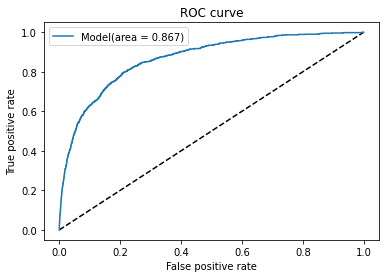

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
Fold 1 | AUC: 0.8626155540665279
Fold 1 | AP: 0.3849630973055488


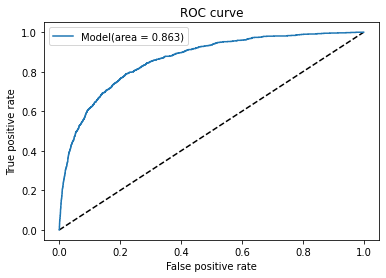

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
Fold 2 | AUC: 0.8669757677029638
Fold 2 | AP: 0.40533600002146797


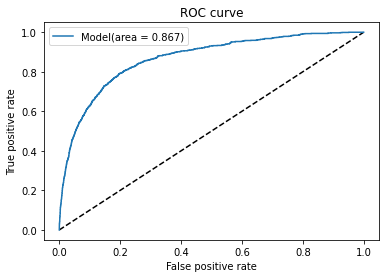

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
Fold 3 | AUC: 0.8645943643670688
Fold 3 | AP: 0.3961029196417055


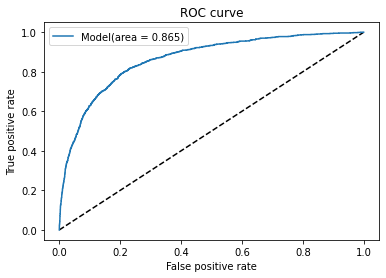

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
Fold 4 | AUC: 0.8664786878202287
Fold 4 | AP: 0.40800623246057943


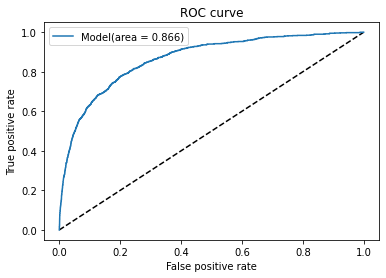

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
Fold 5 | AUC: 0.8733771892866091
Fold 5 | AP: 0.43988118488798555


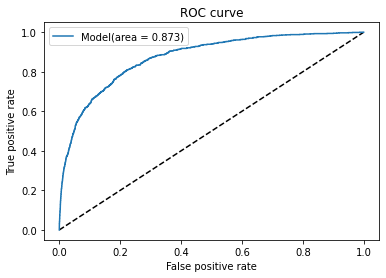

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
Fold 6 | AUC: 0.8598904134865003
Fold 6 | AP: 0.37859680901603604


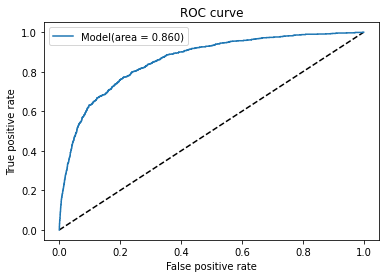

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
Fold 7 | AUC: 0.8591809808016486
Fold 7 | AP: 0.3984755991549263


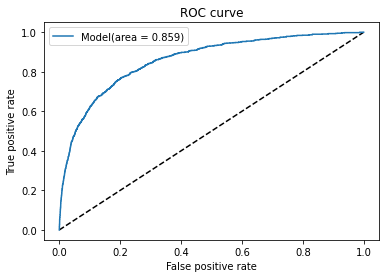

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
Fold 8 | AUC: 0.874316126997327
Fold 8 | AP: 0.4434923753324774


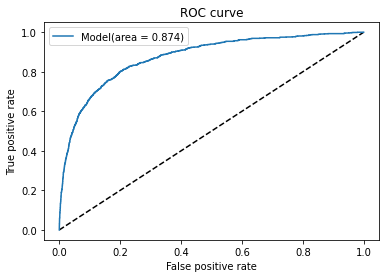

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
Fold 9 | AUC: 0.8643415768833814
Fold 9 | AP: 0.38182803234569784


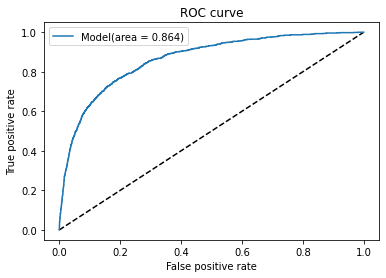


Overall mean auc : 0.8658683710932694

Overall mean mean average : 0.40443479349556477
CPU times: user 31min 3s, sys: 28.3 s, total: 31min 31s
Wall time: 17min 50s


In [46]:
%%time 
# evaluate each strategy on the dataset
results = list()
# Setting a 10-fold stratified cross-validation (note: shuffle=True)
SEED = 42
FOLDS = 10
skf = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=SEED)
# CV interations
# Create arrays for the features and the response variable
roc_auc = list()
average_precision = list()
#X1=X.iloc[0:2000,:].copy()
#y1=y[0:2000].copy()
oof = np.empty((X.shape[0],))
#oof_bin = np.empty((X.shape[0],))
predictions=[]
mean_auc = 0
mean_ap=0
best_iteration = list()
for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):    
    X_train, y_train = X_new.iloc[list(train_idx), :], y.iloc[list(train_idx)]
    X_test, y_test = X_new.iloc[list(test_idx), :],y.iloc[list(test_idx)]
    pipe_lgbm_catboost_qauntile.fit(X_train,y_train)
    preds = pipe_lgbm_catboost_qauntile.predict_proba(X_test)[:,1]
    oof[test_idx] = preds
    auc_score= roc_auc_score(y_true=y_test, y_score=preds)
    roc_auc.append(auc_score)
    print(f"Fold {fold} | AUC: {auc_score}")
    ap=average_precision_score(y_true=y_test, y_score=preds)
    average_precision.append(ap)
    print(f"Fold {fold} | AP: {ap}")
    plot_roc(y_test,preds)
    mean_auc += auc_score / FOLDS
    mean_ap+=ap/FOLDS
    predictions.append(pipe_lgbm_catboost_qauntile.predict_proba(X_test_final)[:,1]) 
    #Mean of the predictions
print(f"\nOverall mean auc : {mean_auc}")
print(f"\nOverall mean mean average : {mean_ap}")

In [47]:
#pipe_lgbm_woe_powertransformer.fit(X,y)
#predictions =pipe_lgbm_woe_powertransformer.predict_proba(X_test_final)[:,1]

In [48]:
predictions = np.mean(np.column_stack(predictions), axis=1)

In [49]:
# Save the predictions to a CSV file
sub = pd.read_csv('../input/GiveMeSomeCredit/sampleEntry.csv')
sub['Probability']=predictions
sub.to_csv('pipe_lgbm_catboost_qauntile_estimator_XGB_CV.csv', index=False)
sub

,Id,Probability
0,1,0.066887
1,2,0.047580
2,3,0.012182
3,4,0.075306
4,5,0.109521
...,...,...
101498,101499,0.034113
101499,101500,0.419753
101500,101501,0.005690
101501,101502,0.062747
